## Step 1 : Importing and reading data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2 : Data Cleaning 

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
median_age = data["Age"].median()
print(median_age)
data["Age"].fillna(data["Age"].median(), inplace=True)
data.isnull().sum()

28.0


/tmp/ipykernel_70275/1107761495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data['Cabin'].fillna('Unknown', inplace=True)

/tmp/ipykernel_70275/1029081825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna('Unknown', inplace=True)


In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [29]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [31]:
data.dropna(subset=["Embarked"] , inplace=True)

In [32]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Step 3 : EDA (Explanatory data analysis)

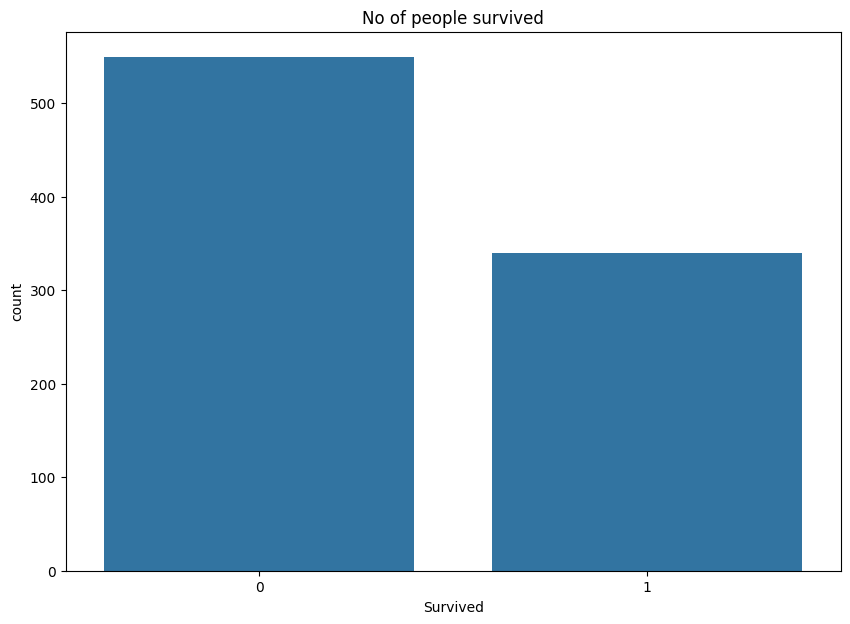

In [33]:
# people survived
plt.figure(figsize=(10,7))
sns.countplot(data=data , x= "Survived")
plt.title("No of people survived")
plt.show()


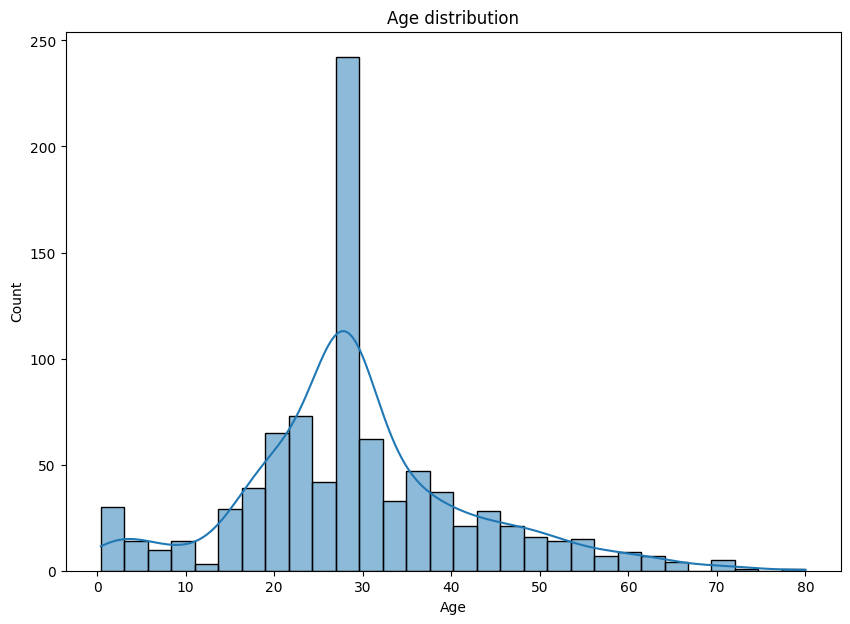

In [35]:
# age distribution
plt.figure(figsize=(10,7))
sns.histplot(data=data , x= "Age" , kde=True)
plt.title("Age distribution")
plt.show()


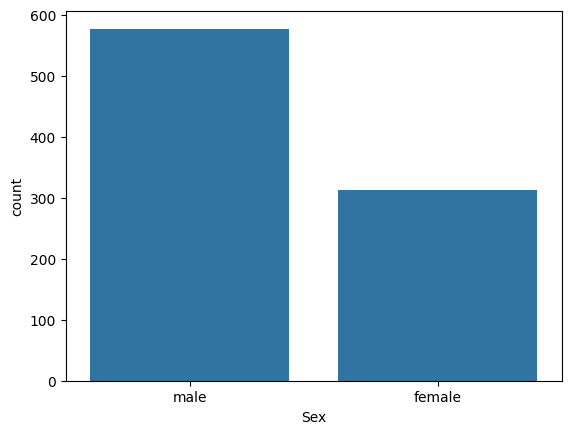

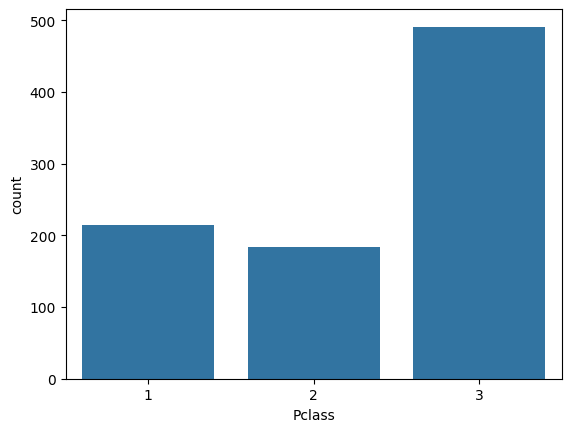

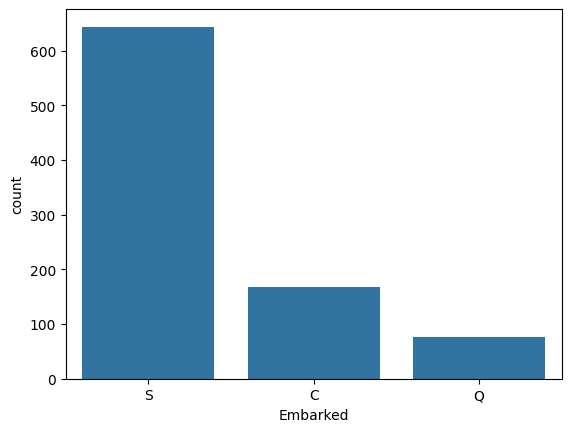

In [36]:
sns.countplot(x='Sex', data=data)
plt.show()

sns.countplot(x='Pclass', data=data)
plt.show()

sns.countplot(x='Embarked', data=data)
plt.show()

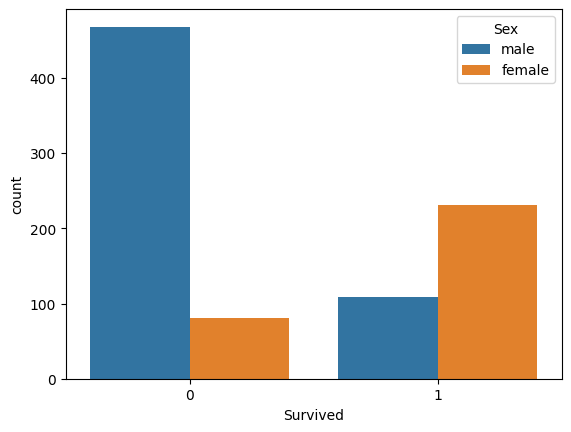

In [37]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()

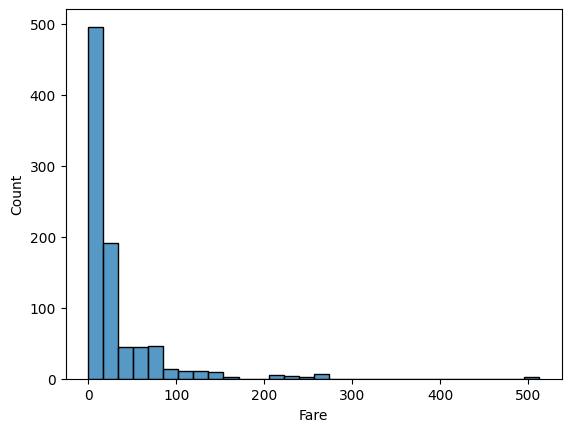

In [38]:
sns.histplot(data['Fare'], bins=30)
plt.show()

In [39]:
print(data[['Age', 'Fare']].describe())

              Age        Fare
count  889.000000  889.000000
mean    29.315152   32.096681
std     12.984932   49.697504
min      0.420000    0.000000
25%     22.000000    7.895800
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


<Axes: xlabel='Survived', ylabel='Age'>

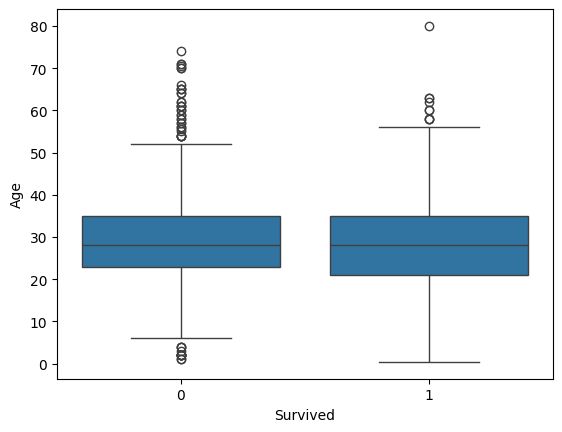

In [41]:
sns.boxplot(data=data , y = "Age" , x = "Survived")

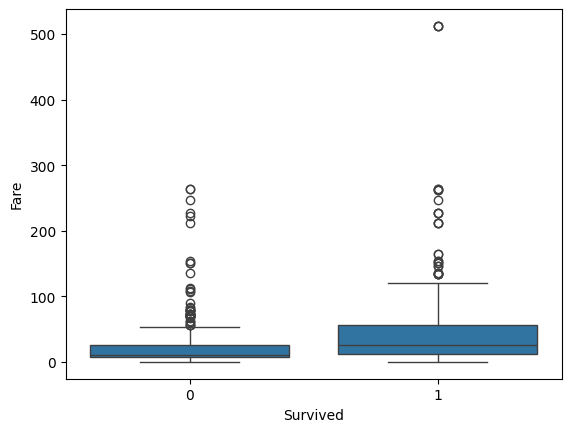

In [42]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.show()

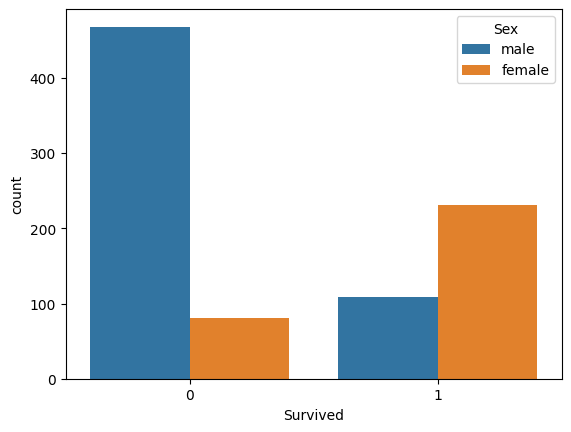

In [43]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()

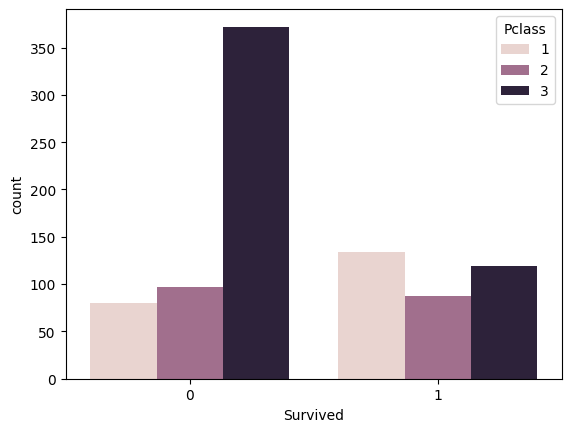

In [44]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.show()

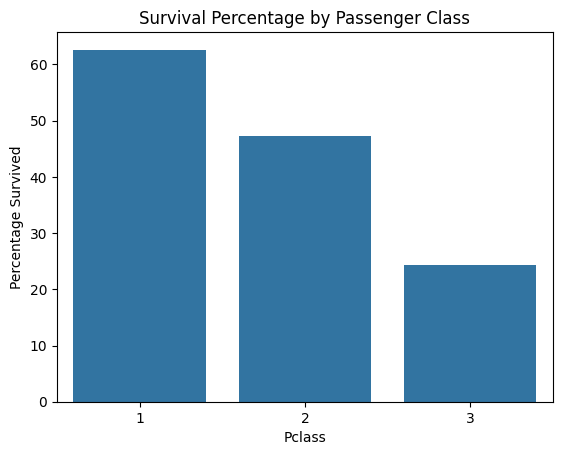

In [45]:

# Calculate survival percentages by Pclass
survival_percentages = data.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Filter for survivors (Survived = 1)
survival_percentages = survival_percentages[survival_percentages['Survived'] == 1]

# Plot the percentages
sns.barplot(x='Pclass', y='Percentage', data=survival_percentages)
plt.title('Survival Percentage by Passenger Class')
plt.ylabel('Percentage Survived')
plt.show()